In [1]:
# Add related paths to system path
import sys
sys.path.append("../src")

import numpy as np
import pandas
import matplotlib.pyplot as plt
from models import FDBaseline, PDABaseline, CDABaseline, LinearUCB, LinearUCBNewRewards, LassoBandit
from utils import mean_confidence_interval, plot_regret, plot_fraction_incorrect
from evaluate import Evaluator

In [2]:
# Load data
data = pandas.read_csv("../data/data.csv", delimiter=',')
print(data.shape)

(5528, 88)


In [3]:
# Define baseline models
fixed = FDBaseline(1) # Define fixed dosage to be 1 (5mg / day)
pharm = PDABaseline()
clinic = CDABaseline()

In [4]:
# Get data for all baselines

# Fixed dosage baseline
fixed_features = fixed.get_features(data)

# Pharmacogenetic dosage baseline
pharm_features = pharm.get_features(data)

# Clinical dosage baseline
clinic_features = clinic.get_features(data)

# Get targets for each set (same targets for each baseline)
targets = fixed.get_targets(data)

In [5]:
# Define evaluators for each model
fixed_eval = Evaluator(fixed)
pharm_eval = Evaluator(pharm)
clinic_eval = Evaluator(clinic)

Fraction of correct decisions: 0.611794500723589


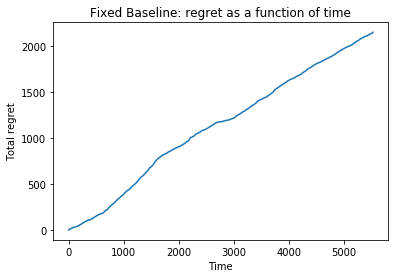

In [6]:

### Evaluate fixed baseline ###

fixed_predictions = fixed.predict(fixed_features)
fixed_acc = fixed_eval.accuracy(fixed_predictions, targets.values)
print("Fraction of correct decisions: " + str(fixed_acc))

fixed_regret = fixed_eval.regret(fixed_predictions, targets.values)
plt.plot(range(fixed_regret.shape[0]), fixed_regret)
plt.title("Fixed Baseline: regret as a function of time")
plt.xlabel("Time")
plt.ylabel("Total regret")
plt.show()

Fraction of correct decisions: 0.6864387593389178


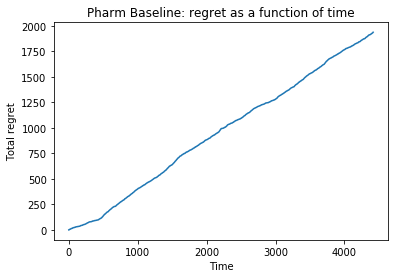

In [7]:

### Evaluate Pharmacogenetic baseline ###

pharm_predictions = pharm.predict(pharm_features.values[~np.isnan(pharm_features).any(axis=1)])
pharm_acc = pharm_eval.accuracy(pharm_predictions, targets.values[~np.isnan(pharm_features).any(axis=1)])
print("Fraction of correct decisions: " + str(pharm_acc))

pharm_regret = fixed_eval.regret(pharm_predictions, targets.values)
plt.plot(range(pharm_regret.shape[0]), pharm_regret)
plt.title("Pharm Baseline: regret as a function of time")
plt.xlabel("Time")
plt.ylabel("Total regret")
plt.show()

Fraction of correct decisions: 0.649083088068825


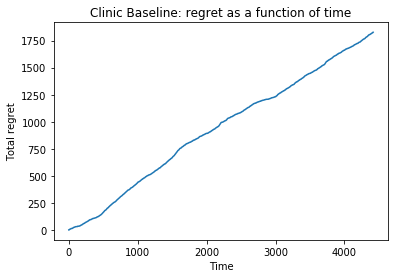

In [8]:

###  Evaluate Clinical baseline ###

clinic_predictions = clinic.predict(clinic_features.values[~np.isnan(clinic_features).any(axis=1)])
clinic_acc = clinic_eval.accuracy(clinic_predictions, targets.values[~np.isnan(clinic_features).any(axis=1)])
print("Fraction of correct decisions: " + str(clinic_acc))

clinic_regret = fixed_eval.regret(clinic_predictions, targets.values)
plt.plot(range(clinic_regret.shape[0]), clinic_regret)
plt.title("Clinic Baseline: regret as a function of time")
plt.xlabel("Time")
plt.ylabel("Total regret")
plt.show()

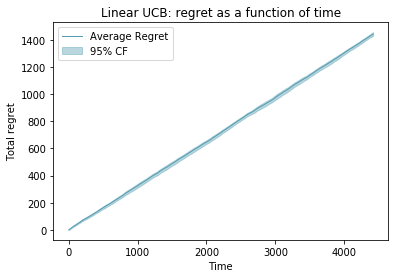

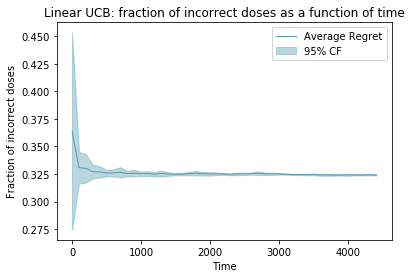

In [9]:

### Linear UCB Model ###

linear_UCB = LinearUCB(num_arms=3, alpha=0.5)
linear_UCB_features = linear_UCB.get_features(data)

num_examples = linear_UCB_features.values[~np.isnan(linear_UCB_features).any(axis=1)].shape[0]
linear_UCB_regret = np.zeros((10, num_examples+1))
linear_UCB_incorrect = np.zeros((10, int(np.ceil(num_examples/100.0)+1)))

num_iters = 10
for i in range(num_iters):
    cur_linear_UCB_regret, cur_linear_UCB_incorrect = linear_UCB.train(linear_UCB_features.values[~np.isnan(linear_UCB_features).any(axis=1)], targets.values[~np.isnan(linear_UCB_features).any(axis=1)])
    linear_UCB_regret[i] = np.array(cur_linear_UCB_regret)
    linear_UCB_incorrect[i] = np.array(cur_linear_UCB_incorrect)

# Plot Linear UCB regret
plot_regret(linear_UCB_regret, num_examples, "Linear UCB: regret as a function of time", 
               "Time", "Total regret", "Average Regret", "95% CF")

# Plot Linear UCB fraction incorrect
plot_fraction_incorrect(linear_UCB_incorrect, num_examples, "Linear UCB: fraction of incorrect doses as a function of time", 
                        "Time", "Fraction of incorrect doses", "Average Regret", "95% CF")

/Users/minhanquinn/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


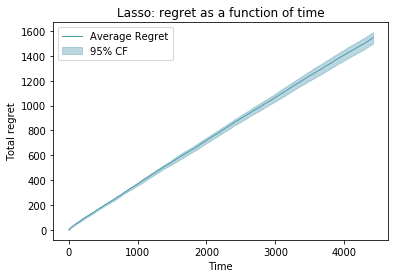

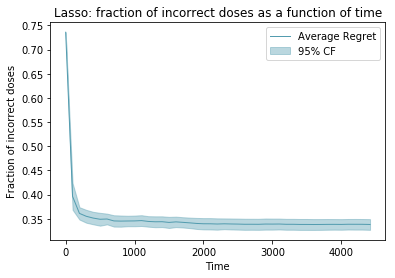

In [10]:

### Lasso Model ###

lasso = LassoBandit(num_arms=3, lambda1=0.05, lambda2=0.05, h=5, q=1)
lasso_features = lasso.get_features(data)

num_examples = lasso_features.values[~np.isnan(lasso_features).any(axis=1)].shape[0]
lasso_regret = np.zeros((10, num_examples+1))
lasso_incorrect = np.zeros((10, int(np.ceil(num_examples/100.0)+1)))

for i in range(10):
    cur_lasso_regret, cur_lasso_incorrect = lasso.train(lasso_features.values[~np.isnan(lasso_features).any(axis=1)], targets.values[~np.isnan(lasso_features).any(axis=1)])
    lasso_regret[i] = np.array(cur_lasso_regret)
    lasso_incorrect[i] = np.array(cur_lasso_incorrect)
    
# Plot Lasso regret
plot_regret(lasso_regret, num_examples, "Lasso: regret as a function of time", 
               "Time", "Total regret", "Average Regret", "95% CF")

# Plot Lasso incorrect
plot_fraction_incorrect(lasso_incorrect, num_examples, "Lasso: fraction of incorrect doses as a function of time", 
                        "Time", "Fraction of incorrect doses", "Average Regret", "95% CF")

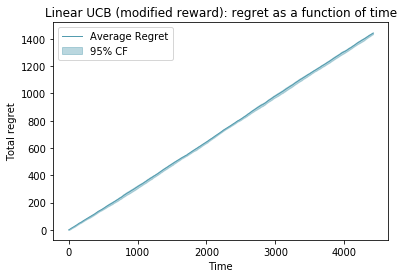

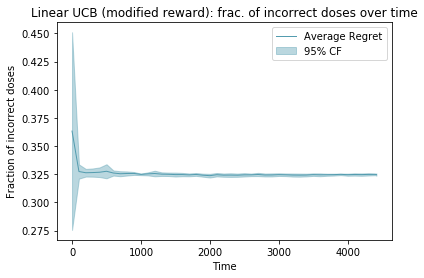

In [11]:

### Linear UCB Model with new reward structure ###

linear_UCB_new_reward = LinearUCB(num_arms=3, alpha=0.5)
linear_UCB_new_reward_features = linear_UCB_new_reward.get_features(data)

num_examples = linear_UCB_new_reward_features.values[~np.isnan(linear_UCB_new_reward_features).any(axis=1)].shape[0]
linear_UCB_new_reward_regret = np.zeros((10, num_examples+1))
linear_UCB_new_reward_incorrect = np.zeros((10, int(np.ceil(num_examples/100.0)+1)))

num_iters = 10
for i in range(num_iters):
    cur_linear_UCB_new_reward_regret, cur_linear_UCB_new_reward_incorrect = linear_UCB_new_reward.train(linear_UCB_new_reward_features.values[~np.isnan(linear_UCB_new_reward_features).any(axis=1)], 
                                                                                                        targets.values[~np.isnan(linear_UCB_new_reward_features).any(axis=1)])
    linear_UCB_new_reward_regret[i] = np.array(cur_linear_UCB_new_reward_regret)
    linear_UCB_new_reward_incorrect[i] = np.array(cur_linear_UCB_new_reward_incorrect)

# Plot Linear UCB regret
plot_regret(linear_UCB_new_reward_regret, num_examples, "Linear UCB (modified reward): regret as a function of time", 
               "Time", "Total regret", "Average Regret", "95% CF")

# Plot Linear UCB fraction incorrect
plot_fraction_incorrect(linear_UCB_new_reward_incorrect, num_examples, "Linear UCB (modified reward): frac. of incorrect doses over time",
                        "Time", "Fraction of incorrect doses", "Average Regret", "95% CF")
